In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt

In [3]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [4]:
data = np.loadtxt("sine.txt")
X = np.array(data[:, 0], requires_grad=False)
Y = np.array(data[:, 1], requires_grad=False)
X

tensor([-0.11268649, -0.33012851,  0.54373733,  0.80704866,  0.55538057,
        -0.54107054,  0.18935581,  0.96781585, -0.41327059,  0.74415499,
         0.44696605, -0.61363691,  0.46700535, -0.46362292, -0.41446341,
         0.89264975, -0.47079991, -0.2955473 ,  0.44892779,  0.53951118,
        -0.29307285, -0.44140687, -0.8658363 , -0.46238505, -0.79031102,
         0.45223883,  0.55915356, -0.27292549,  0.50598212, -0.54465434,
         0.20336814, -0.06167003,  0.57968508, -0.76169877,  0.89485069,
         0.55135851,  0.64914088, -0.79001714,  0.23949858,  0.0867956 ,
        -0.74334397, -0.13825349,  0.39121447,  0.00496675, -0.67400404,
         0.77653034,  0.89483284, -0.51471674,  0.09288003,  0.09092684], requires_grad=False)

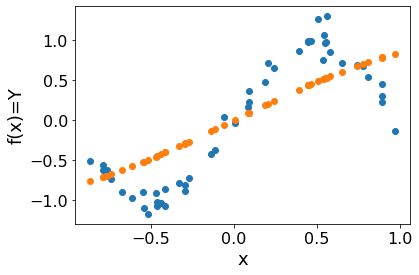

In [5]:
plt.scatter(X,Y)
plt.scatter(X,np.sin(X))
plt.xlabel("x", fontsize=18)  # helps to increase the size of "X" and "f(X)"
plt.ylabel("f(x)=Y", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

In [6]:
def layer(l):
    if len(l)!=5:
        raise ValueError("Total number of parameters must be 5")
    qml.Rotation(l[0],wires=0)
    qml.Squeezing(l[1],0.0,wires=0)
    qml.Rotation(l[2],wires=0)
    qml.Displacement(l[3],0.0,wires=0)
    
    qml.Kerr(l[4],wires=0)
    


In [7]:
@qml.qnode(dev)
def QNN(params,input_val):
    qml.Displacement(input_val,0,wires=0)
    
    for l in params:
        layer(l)
        
    return qml.expval(qml.X(0))



In [8]:
def square_loss(predictions,actual):
    sq_loss=0
    #loss=0
    for a,y in zip(predictions,actual):
        sq_loss=sq_loss + (a - y)**2
        
    sq_loss=sq_loss/len(predictions)
    
    return sq_loss


In [9]:
def cost(params,actual,x):
    predictions=[QNN(params,input_val) for input_val in x]
    
    return square_loss(predictions,actual)


In [13]:
num_layers=5
weights=np.random.rand(num_layers,5)
print(weights)

[[0.78981005 0.54187346 0.39117397 0.28377719 0.59821686]
 [0.13918238 0.01212552 0.69583314 0.95184168 0.39810368]
 [0.01736504 0.59771038 0.67636964 0.7795381  0.97389857]
 [0.29652563 0.97576092 0.79311068 0.10479415 0.62349237]
 [0.40952751 0.25999087 0.34281258 0.9353035  0.00902065]]


In [14]:
predictions=[QNN(weights,input_val) for input_val in X]
#predictions

[0.         0.04081633 0.08163265 0.12244898 0.16326531 0.20408163
 0.24489796 0.28571429 0.32653061 0.36734694 0.40816327 0.44897959
 0.48979592 0.53061224 0.57142857 0.6122449  0.65306122 0.69387755
 0.73469388 0.7755102  0.81632653 0.85714286 0.89795918 0.93877551
 0.97959184 1.02040816 1.06122449 1.10204082 1.14285714 1.18367347
 1.2244898  1.26530612 1.30612245 1.34693878 1.3877551  1.42857143
 1.46938776 1.51020408 1.55102041 1.59183673 1.63265306 1.67346939
 1.71428571 1.75510204 1.79591837 1.83673469 1.87755102 1.91836735
 1.95918367 2.        ]


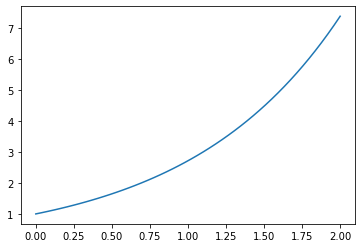

In [2]:
E = np.linspace(0,2,50)
F= np.exp(E)
print(E)
plt.plot(E,F)

In [20]:
cost(weights,F,E)

tensor(9.4432794, requires_grad=True)

In [30]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)
#cost_arr=[]
#params_arr=[]
#var = weights
for it in range(200+1):
    weights, _cost = opt.step_and_cost(lambda params: cost(params, F, E), weights)
    if it%10==0:
        print("Iter: {:5d} | Cost: {:0.7f} ".format(it, _cost))
        params_arr.append(weights)
        cost_arr.append(cost(weights,Y,X))
    

Iter:     0 | Cost: 0.6498526 
Iter:    10 | Cost: 0.6400309 
Iter:    20 | Cost: 0.6269953 
Iter:    30 | Cost: 0.6178858 
Iter:    40 | Cost: 0.6094205 
Iter:    50 | Cost: 0.6014182 
Iter:    60 | Cost: 0.5922244 
Iter:    70 | Cost: 0.5858255 
Iter:    80 | Cost: 0.5847512 
Iter:    90 | Cost: 0.5837661 
Iter:   100 | Cost: 0.5831140 
Iter:   110 | Cost: 0.5825620 
Iter:   120 | Cost: 0.5820592 
Iter:   130 | Cost: 0.5815902 
Iter:   140 | Cost: 0.5811353 
Iter:   150 | Cost: 0.5806860 
Iter:   160 | Cost: 0.5802462 
Iter:   170 | Cost: 0.5798175 
Iter:   180 | Cost: 0.5794027 
Iter:   190 | Cost: 0.5790042 
Iter:   200 | Cost: 0.5786234 


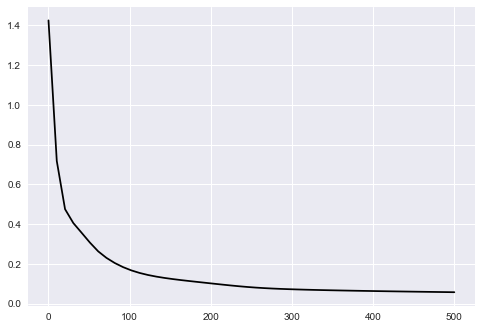

In [99]:
x=np.linspace(0,500,50)
plt.style.use("seaborn")
y=cost_arr
plt.plot(x,y,"black",label="cost values")

In [123]:

p=[]
for i in range(50):
    p.append(params_arr[i].flatten())
#plt.plot(x,par_y)
#params_arr[0]
params_arr[0].flatten()

tensor([0.79053543, 0.22708697, 0.34851396, 0.92491902, 0.70125212,
        0.02867665, 0.16153188, 0.62464068, 0.57406631, 0.2410551 ,
        0.93737628, 0.61712823, 0.53879508, 0.59307225, 0.73328431,
        0.31510727, 0.39505878, 0.20668147, 0.18303073, 0.94121011,
        0.73638852, 0.48729653, 0.22425235, 0.2511942 , 0.05486688], requires_grad=True)

In [124]:
len(p)

50

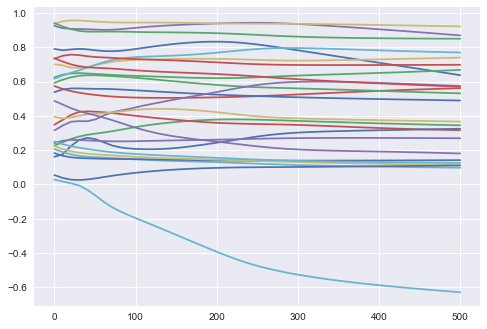

In [125]:
plt.plot(x,p)

In [ ]:
pred=[QNN(weights,X) ]

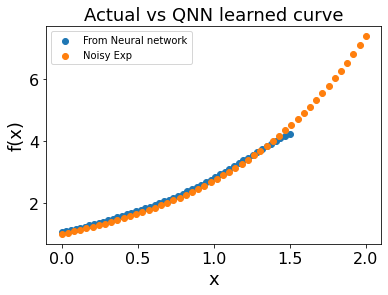

In [34]:
x=np.linspace(0,1.5,50)
pred=[QNN(weights,i) for i in x]
plt.scatter(x,pred,label="From Neural network")
plt.scatter(E,F,label="Noisy Exp")
#plt.plot(x,np.sin(x),label="actual sin")
plt.xlabel("x", fontsize=18)  # helps to increase the size of "X" and "f(X)"
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)   # helps to increase the size of the values in X and Y axis
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.title("Actual vs QNN learned curve", fontsize=18)
plt.legend()
plt.show()

In [133]:
QNN.draw()

' 0: ──D(1, 0)──R(0.631)──S(0.344, 0)──R(0.316)──D(0.866, 0)──Kerr(0.741)──R(-0.632)──S(0.326, 0)──R(0.67)──D(0.563, 0)──Kerr(0.269)──R(0.921)──S(0.769, 0)──R(0.489)──D(0.53, 0)──Kerr(0.698)──R(0.573)──S(0.366, 0)──R(0.0967)──D(0.142, 0)──Kerr(0.85)──R(0.568)──S(0.179, 0)──R(0.112)──D(0.125, 0)──Kerr(0.111)──┤ ⟨x⟩ \n'

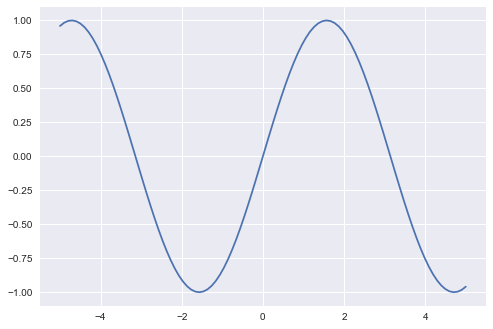

In [148]:
x1=np.linspace(-5,5,100)
plt.plot(x1,np.sin(x1))